# PCOSs Dataset with GridSearch CV

In [43]:
%pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=353b5d474b993efb2fde4a6c6ce4707c6e688b4a048651b4b5b515ee573a94c3
  Stored in directory: c:\users\soham\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy\\compat\\py3k.py'
Consider using the `--user` option or check the permissions.



In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV

In [36]:
pcos_df = pd.read_csv("C:\\Users\\Soham\\Dropbox\\My PC (LAPTOP-AGG4JAFB)\\Desktop\\2nd Sem\\JK PCOS\\PCOS_data.csv")
pcos_df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [37]:
for i in ['AMH(ng/mL)', 'II    beta-HCG(mIU/mL)']:
    pcos_df[i] = pd.to_numeric(pcos_df[i], errors='coerce')
pcos_df = pcos_df.drop(['Sl. No', 'Patient File No.', 'Unnamed: 44'], axis =1)

In [38]:
target = pcos_df.columns[:1].to_list()
features = pcos_df.columns[1:].to_list()
print("Total number of Features:", len(features))

Total number of Features: 41


In [39]:
pcos_df.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [40]:
pcos = pcos_df.dropna()

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

num = 30

bestfeatures = SelectKBest(score_func=chi2, k=num)
fit = bestfeatures.fit(pcos[features], pcos[target])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(pcos.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature','Score']
featureScores = featureScores.sort_values(by='Score', ascending = False)
featureScores = featureScores[featureScores.Feature != target[0]]
featureScores = featureScores.reset_index(drop = True)
featureScores[:num]

,Feature,Score
0,PRL(ng/mL),9600.594045
1,No. of abortions,6899.358709
2,FSH(mIU/mL),2572.753526
3,II beta-HCG(mIU/mL),1592.273459
4,I beta-HCG(mIU/mL),1012.628577
5,Follicle No. (L),673.143812
6,BP _Diastolic (mmHg),564.595226
7,TSH (mIU/L),221.815736
8,LH(mIU/mL),96.235867
9,hair growth(Y/N),85.664994


In [19]:
new_features = featureScores['Feature'].to_list()
new_features = new_features[:num]

In [46]:
X = pcos.drop(['PCOS (Y/N)'], axis=1)

y = pcos['PCOS (Y/N)']

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, new_features)])

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [48]:
X_train.shape, X_test.shape

((359, 41), (178, 41))

In [49]:
X_train.dtypes

 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/N)            int64
Skin darkening

In [51]:
from sklearn.tree import DecisionTreeClassifier


In [52]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [54]:
prediction = clf.predict(X_test)
confusion_matrix(y_test, prediction)

array([[113,   9],
       [ 22,  34]], dtype=int64)

In [ ]:
f1_score(y_test,prediction, average="micro")

In [53]:
import warnings

warnings.filterwarnings('ignore')

rfc = DecisionTreeClassifier()

forest_params = [{'max_depth': list(range(1, 10)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 4, 'max_features': 12}
0.8857936507936508


In [55]:
prediction = clf.predict(X_test)
confusion_matrix(y_test, prediction)

array([[113,   9],
       [ 22,  34]], dtype=int64)

In [56]:
f1_score(y_test,prediction, average="micro")

0.8258426966292135

In [57]:
accuracy_score(y_test, prediction)

0.8258426966292135

In [58]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 18).fit(X_train, y_train)

In [62]:
prediction = clf.predict(X_test)

In [63]:
confusion_matrix(y_test, prediction)

array([[118,   4],
       [ 20,  36]], dtype=int64)

In [64]:
accuracy_score(y_test, prediction)

0.8651685393258427

In [65]:
f1_score(y_test,prediction, average="micro")

0.8651685393258428

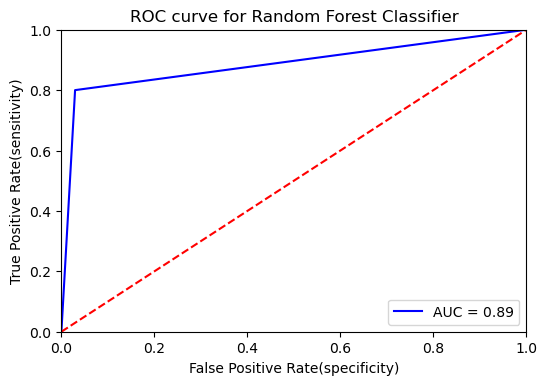

In [34]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test[target], pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(dpi = 100)
plt.title('ROC curve for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate(specificity)')
plt.show()